In [1]:
#Importo las librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.model_selection import train_test_split 
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Limpieza y preparacion de set de datos

In [2]:
#importo el dataset y hago revision de los datos

df = pd.read_csv("titles_filtrado.csv")



In [3]:
# Drop de columnas innecesarias
df.drop("id", inplace=True, axis=1)

df.drop("imdb_id", inplace=True, axis=1)

# Limpio `genres` y `production_countries`, devuelta tomando el primer elemento de de la lista que cada valor retenga
def parse_list(row):
    parsed = str(row)[1:-1].split(",")
    for i in range(len(parsed)):
        parsed[i] = parsed[i].strip()[1:-1]
        
    return parsed[0] if parsed[0] != '' else 'N/A'

df['genres_parsed'] = df['genres'].map(parse_list)
df['prod_countries_parsed'] = df['production_countries'].map(parse_list)
df[['genres_parsed', 'prod_countries_parsed']]


,genres_parsed,prod_countries_parsed
0,documentation,US
1,drama,US
2,drama,US
3,fantasy,GB
4,war,GB
...,...,...
5845,romance,NG
5846,drama,N/A
5847,comedy,CO
5848,N/A,US


In [4]:
# Añado la columna 'is_movie'
df['is_movie'] = df.type.map(lambda x: 0 if x == 'SHOW' else 1)

In [5]:
# Drop de columnas innecesarias
df.drop("title", axis=1, inplace=True)
df.drop("description", axis=1, inplace=True)

# Relleno valores nulos
df['age_certification'].fillna("N/A", inplace=True)
df['seasons'].fillna(0.0, inplace=True)
df['tmdb_popularity'].fillna(df['tmdb_popularity'].mean(), inplace=True)
df.dropna(subset='imdb_votes',inplace=True)




In [29]:

indexNames = df[df['imdb_votes'] <= 5e+02].index

df.drop(indexNames , inplace=True)

df.round({'imdb_score': 0})


,Unnamed: 0,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genres_parsed,prod_countries_parsed,is_movie
1,1,MOVIE,1976,R,114,"['drama', 'crime']",['US'],0.0,8.0,808582.0,40.965,8.2,drama,US,1
2,2,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,8.0,107673.0,10.010,7.3,drama,US,1
3,3,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.0,534486.0,15.461,7.8,fantasy,GB,1
4,4,MOVIE,1967,N/A,150,"['war', 'action']","['GB', 'US']",0.0,8.0,72662.0,20.398,7.6,war,GB,1
5,5,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,9.0,73424.0,17.617,8.3,comedy,GB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,5821,MOVIE,2021,N/A,148,"['thriller', 'action', 'drama']",['IN'],0.0,5.0,1497.0,1.978,5.3,thriller,IN,1
5822,5822,MOVIE,2021,N/A,92,['drama'],['SA'],0.0,7.0,1007.0,1.971,7.5,drama,SA,1
5827,5827,MOVIE,2021,N/A,95,"['comedy', 'drama', 'family']",['ZA'],0.0,7.0,1164.0,3.827,6.0,comedy,ZA,1
5831,5831,SHOW,2021,TV-MA,37,"['drama', 'romance']",['IN'],1.0,5.0,738.0,1.400,5.5,drama,IN,0


In [6]:
df.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie
count,5352.000000,5352.000000,5352.000000,5352.000000,5352.000000,5.352000e+03,5352.000000,5352.000000,5352.000000
mean,2862.081465,2016.289985,78.666854,0.808670,6.510613,2.343938e+04,23.492616,6.824141,0.637706
std,1685.699983,7.012629,38.683360,1.982453,1.164240,9.582047e+04,83.589788,1.122987,0.480708
min,1.000000,1954.000000,0.000000,0.000000,1.500000,5.000000e+00,0.600000,1.000000,0.000000
25%,1408.750000,2016.000000,45.000000,0.000000,5.800000,5.167500e+02,2.970000,6.200000,0.000000
50%,2804.500000,2018.000000,86.000000,0.000000,6.600000,2.233500e+03,7.335500,6.800000,1.000000
75%,4311.500000,2020.000000,105.000000,1.000000,7.300000,9.494000e+03,17.893000,7.500000,1.000000
max,5849.000000,2022.000000,225.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000,1.000000


# Aplicacion de modelos de regression

In [7]:
# Transfroma las variables categoricas en numericas

all_data = pd.get_dummies(df[[  'age_certification',
                                'genres_parsed', 
                                'prod_countries_parsed', 
                                'imdb_votes', 
                                'seasons', 
                                'is_movie',
                                'release_year',
                                'runtime']])



In [8]:
#creamos las variables base

X = all_data.copy()
y = df['imdb_score']

In [9]:
#Creo las variables de prueba y entrenamiento

from sklearn.model_selection import train_test_split, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Metodo de verificacion

Como han aparecido varias discrepancias en los metodos de scoring de los modelos por parte de las librerias propias de Sklearn, adoptamos el uso del siguiente metodo para poder visualizar el promedio de los errores cuadrados, absolutos y absoluto porcentual.

In [10]:
#Este es un metodo para ver el error en el modelo

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def score_dataset(X_train, X_valid, y_train, y_valid, model=RandomForestRegressor(n_estimators=1000, random_state=0)):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return {"mean_squared_error": mean_squared_error(y_valid, preds), "mean_absolute_error": mean_absolute_error(y_valid, preds), "mean_absolute_percentage_error": mean_absolute_percentage_error(y_test, preds)}

#### Regresion lineal

In [11]:
#Regresion Lineal

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
#Hacemos nuestras predicciones
y_lin = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.24125207610051957

In [13]:
scores = -1 * cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=LinearRegression())

{'mean_squared_error': 1.0604510979400492,
 'mean_absolute_error': 0.7917264186935299,
 'mean_absolute_percentage_error': 0.1392935341303904}

#### Regresion Bayesiana

In [14]:
from sklearn.linear_model import BayesianRidge


bayreg = BayesianRidge(n_iter=10000)
bayreg.fit(X_train, y_train)
y_bay = bayreg.predict(X_test)
bayreg.score(X_test,y_test)

0.24714829935643456

In [15]:
scores = -1 * cross_val_score(bayreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=BayesianRidge())

{'mean_squared_error': 1.0522103420467086,
 'mean_absolute_error': 0.7874262387025767,
 'mean_absolute_percentage_error': 0.13879485977165665}

#### Busqueda por Emparejamiento Ortogonal

In [16]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

orthreg = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())
orthreg.fit(X_train, y_train)
y_orth = orthreg.predict(X_test)
orthreg.score(X_test,y_test)

0.23133408290229696

In [17]:
scores = -1 * cross_val_score(orthreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=OrthogonalMatchingPursuit())

{'mean_squared_error': 1.0743128120154746,
 'mean_absolute_error': 0.7997078954129927,
 'mean_absolute_percentage_error': 0.14052516371401463}

#### Regresion LASSO

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1, 10 , 100], 'max_iter': [1, 10,100], 'tol': [1e-2, 1, 10], 'selection': ['cyclic','random']}


grid = GridSearchCV(Lasso(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ....alpha=1, max_iter=1, selection=cyclic, tol=0.01; total time=   0.0s
[CV] END ....alpha=1, max_iter=1, selection=cyclic, tol=0.01; total time=   0.0s
[CV] END ....alpha=1, max_iter=1, selection=cyclic, tol=0.01; total time=   0.0s
[CV] END ....alpha=1, max_iter=1, selection=cyclic, tol=0.01; total time=   0.0s
[CV] END ....alpha=1, max_iter=1, selection=cyclic, tol=0.01; total time=   0.0s
[CV] END .......alpha=1, max_iter=1, selection=cyclic, tol=1; total time=   0.0s
[CV] END .......alpha=1, max_iter=1, selection=cyclic, tol=1; total time=   0.0s
[CV] END .......alpha=1, max_iter=1, selection=cyclic, tol=1; total time=   0.0s
[CV] END .......alpha=1, max_iter=1, selection=cyclic, tol=1; total time=   0.0s
[CV] END .......alpha=1, max_iter=1, selection=cyclic, tol=1; total time=   0.0s
[CV] END ......alpha=1, max_iter=1, selection=cyclic, tol=10; total time=   0.0s
[CV] END ......alpha=1, max_iter=1, selection=c

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 10, 100], 'max_iter': [1, 10, 100],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.01, 1, 10]},
             verbose=2)

In [30]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

Lasso(alpha=1, max_iter=10, tol=1)
{'alpha': 1, 'max_iter': 10, 'selection': 'cyclic', 'tol': 1}
0.06314673440942006


In [31]:


lassoreg = Lasso(alpha=1, max_iter=100, tol=1)
lassoreg.fit(X_train, y_train)
y_lasso = lassoreg.predict(X_test)
lassoreg.score(X_test,y_test)

0.06301736352211407

In [32]:
scores = -1 * cross_val_score(lassoreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=Lasso())

{'mean_squared_error': 1.3095261794354205,
 'mean_absolute_error': 0.8990490549498593,
 'mean_absolute_percentage_error': 0.15788761983182706}

#### Regresion de Vector de Soporte


In [34]:
#Buscamos los parametros optimos para nuestro modelo

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1 , 10, 100], 'epsilon': [0.1,1,10],'kernel': ['sigmoid','rbf']}


grid = GridSearchCV(SVR(cache_size=500),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...................C=1, epsilon=0.1, kernel=sigmoid; total time=   1.9s
[CV] END ...................C=1, epsilon=0.1, kernel=sigmoid; total time=   2.4s
[CV] END ...................C=1, epsilon=0.1, kernel=sigmoid; total time=   2.1s
[CV] END ...................C=1, epsilon=0.1, kernel=sigmoid; total time=   2.3s
[CV] END ...................C=1, epsilon=0.1, kernel=sigmoid; total time=   1.8s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   1.8s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   2.4s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=   2.9s
[CV] END .....................C=1, epsilon=1, kernel=sigmoid; total time=   1.9s
[CV] END .....................C=1, epsilon=1, ke

GridSearchCV(estimator=SVR(cache_size=500),
             param_grid={'C': [1, 10, 100], 'epsilon': [0.1, 1, 10],
                         'kernel': ['sigmoid', 'rbf']},
             verbose=2)

In [35]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

SVR(C=100, cache_size=500, epsilon=1)
{'C': 100, 'epsilon': 1, 'kernel': 'rbf'}
0.05117843961480504


In [38]:
#Cargamos los parametros y las variables para los entrenamientos.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVR_regr = make_pipeline(StandardScaler(), SVR(C=10, epsilon=1, kernel='rbf', cache_size=500))
SVR_regr.fit(X_train, y_train)
y_svr=SVR_regr.predict(X_test)
SVR_regr.score(X_test,y_test)


0.23539786504616522

In [39]:
scores = -1 * cross_val_score(SVR_regr, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=SVR())

{'mean_squared_error': 1.3303786645651188,
 'mean_absolute_error': 0.9007123917133733,
 'mean_absolute_percentage_error': 0.16080369430477937}

## Analisis de Regresiones

In [40]:
#Creamos un dataframe con los resultados de todas las predicciones realizadas

df_predicciones = pd.DataFrame({'Actual': y_test, 
                                'Predicted_Lin': y_lin, 
                                'Predicted_Bayesian': y_bay,
                                'Predicted_OrthMatch': y_orth,
                                'Predicted_Lasso': y_lasso,
                                'Predicted_SVR': y_svr})
df_predicciones

,Actual,Predicted_Lin,Predicted_Bayesian,Predicted_OrthMatch,Predicted_Lasso,Predicted_SVR
1667,6.0,5.867306,5.967193,6.048364,6.322425,6.318928
3681,5.6,6.069089,6.056198,5.964343,6.444028,6.247252
3770,6.8,5.943196,6.065754,6.279766,6.591758,5.990924
4545,4.3,5.705154,5.812519,5.950380,6.401976,4.740561
121,7.9,7.744024,7.731907,7.688326,6.746248,7.664692
...,...,...,...,...,...,...
3280,4.8,5.891026,5.889851,5.931396,6.252568,5.474467
4248,7.0,5.738005,5.764764,5.929052,6.400625,5.679277
5620,5.1,5.569506,5.731527,5.623464,6.637990,6.078776
2738,7.6,6.390880,6.358382,5.984217,6.247587,5.781625


In [41]:
#Añadimos una columna donde se encuentra el promedio de todas las predicciones realizadas para cada produccion.

df_predicciones['Promedio']= (  df_predicciones['Predicted_Lin'] + 
                                df_predicciones['Predicted_Bayesian'] +
                                df_predicciones['Predicted_OrthMatch'] +
                                df_predicciones['Predicted_Lasso'] +
                                df_predicciones['Predicted_SVR']) /5

df_predicciones

,Actual,Predicted_Lin,Predicted_Bayesian,Predicted_OrthMatch,Predicted_Lasso,Predicted_SVR,Promedio
1667,6.0,5.867306,5.967193,6.048364,6.322425,6.318928,6.104843
3681,5.6,6.069089,6.056198,5.964343,6.444028,6.247252,6.156182
3770,6.8,5.943196,6.065754,6.279766,6.591758,5.990924,6.174280
4545,4.3,5.705154,5.812519,5.950380,6.401976,4.740561,5.722118
121,7.9,7.744024,7.731907,7.688326,6.746248,7.664692,7.515039
...,...,...,...,...,...,...,...
3280,4.8,5.891026,5.889851,5.931396,6.252568,5.474467,5.887862
4248,7.0,5.738005,5.764764,5.929052,6.400625,5.679277,5.902345
5620,5.1,5.569506,5.731527,5.623464,6.637990,6.078776,5.928252
2738,7.6,6.390880,6.358382,5.984217,6.247587,5.781625,6.152538


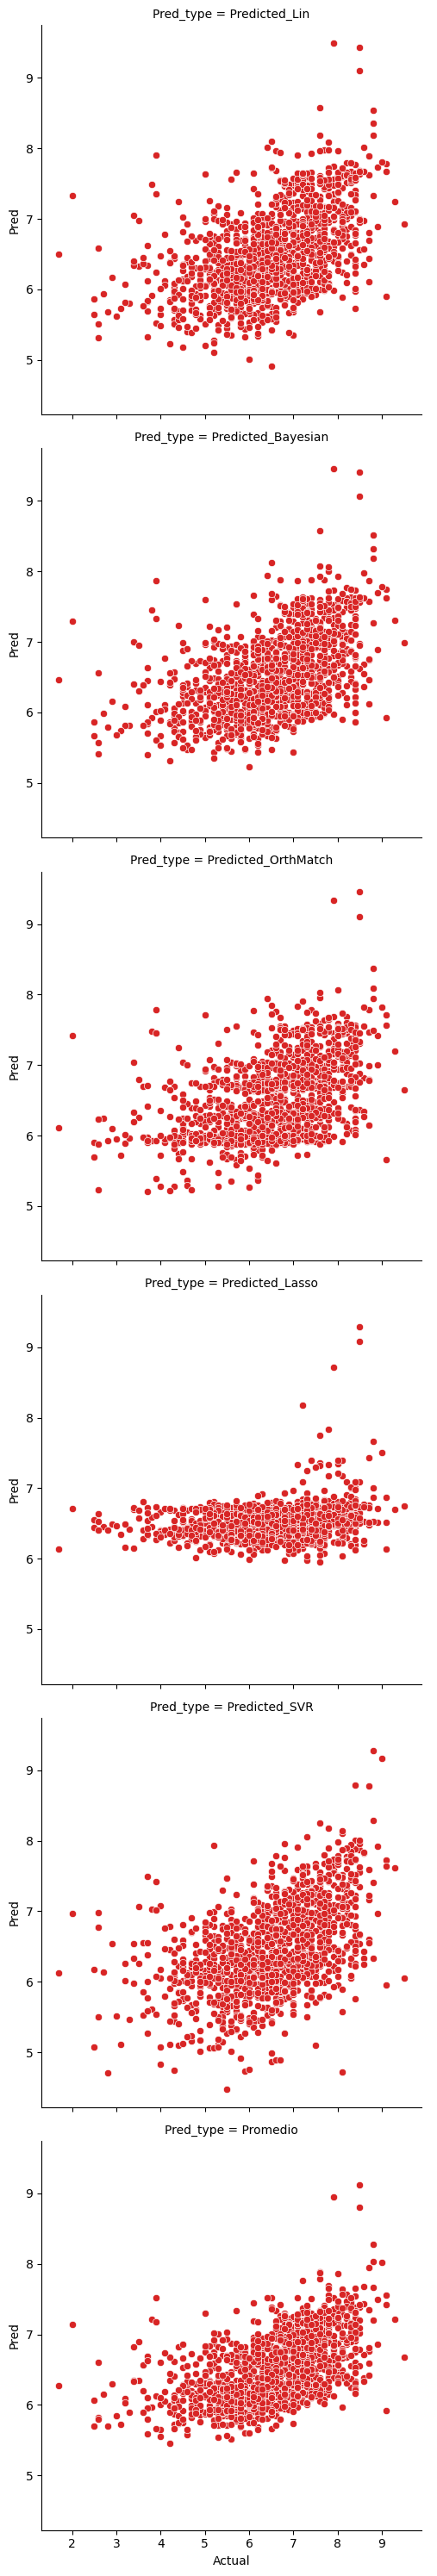

In [42]:
#Graficamos las predicciones realizadas.

df_to_scatter = df_predicciones.melt('Actual',var_name='Pred_type', value_name='Pred')
colors = ["#d82525", "#464646"]

sns.set_palette(sns.color_palette(colors))
g = sns.FacetGrid(df_to_scatter, row="Pred_type", height=5, palette="red")
g.map(sns.scatterplot, "Actual", "Pred")
g.add_legend()


In [43]:
#Calculamos media y mediana porcentual de la diferencia de todas las predicciones realizadas.

df_predicciones['diferencia'] = (df_predicciones["Actual"] - df_predicciones["Promedio"])*100/2
print(
df_predicciones['diferencia'].median(),
df_predicciones['diferencia'].mean()
)

4.855481480910684 0.4449614709891571
